<br>

### Importando as bibliotecas
<br>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

<br>

### Importando o arquivo limpo e verificando
<br>

In [36]:
df_titanic = pd.read_csv("titanic_data_github/titanic_github_limpo.csv", sep=",")


In [37]:
#verificando
df_titanic.head()

#deu certo

,passenger_id,survived,p_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
passenger_id    1309 non-null int64
survived        1309 non-null int64
p_class         1309 non-null int64
name            1309 non-null object
sex             1309 non-null object
age             1046 non-null float64
sibsp           1309 non-null int64
parch           1309 non-null int64
ticket          1309 non-null object
fare            1308 non-null float64
cabin           295 non-null object
embarked        1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


#### Observações

- Há falta de dados na coluna "age" e "cabin". Todas as células da linha COUNT possuem valor 1309, exceto a coluna AGE e CABIN;
- passenger_id está como inteiro, mas deveria ser string, porque se trata de uma variável categórica.


<br>

### Verificando se há linha duplicada 


<br>

  

In [5]:
df_titanic.duplicated().any()

#não tem nada duplicado

False

<br>

### Sumário estatístico
<br>

#### Observações

- As idades variam de 0.17 a 80 anos, tendo como média, 30 anos de idade. Essa pessoa com 0.17 anos era um bebê ou foi um erro de digitação?;
- 37,74% dos tripulantes sobreviveram ao naufrágio.

In [6]:
df_titanic.describe()

,passenger_id,survived,p_class,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Distribuição das idades

#### Observações

- A maioria dos passageiros possui pouco mais de vinte anos e menos de 40

- Apesar da distribuição de idades de homens e mulheres terem o pico entre 20 e 30 anos, a distribuição feminina é mais aberta e está mais à esquerda, em relação à masculina. Isso quer dizer que a maior parte das mulheres do navio eram um pouco mais novas do que os homens.



''

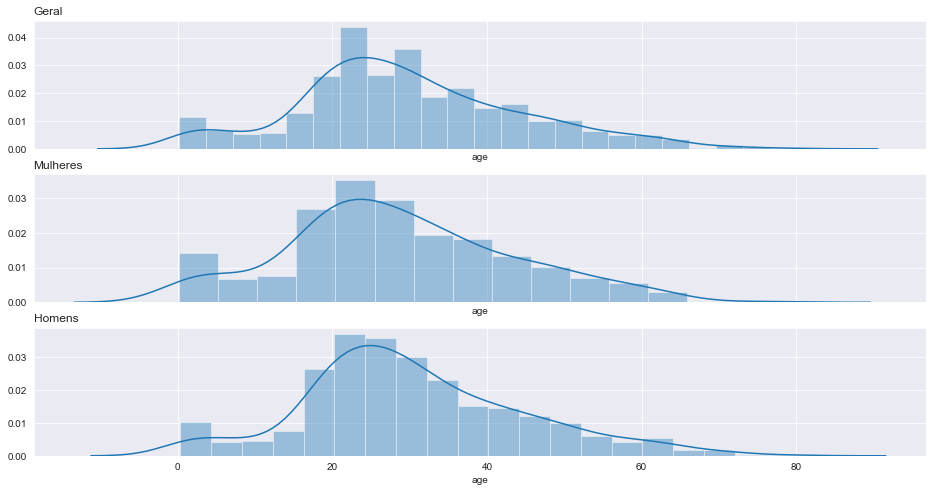

In [7]:
fig, (ax1,ax2,ax3)= plt.subplots(3, 1, figsize=(16,8), sharex=True)
sns.distplot(df_titanic["age"].dropna(), ax=ax1)

women = df_titanic[df_titanic["sex"] == "female"]
sns.distplot(women["age"].dropna(), ax=ax2)

men = df_titanic[df_titanic["sex"] == "male"]
sns.distplot(men["age"].dropna(), ax=ax3)

ax1.set_title("Geral", loc="left")
ax2.set_title("Mulheres", loc="left")
ax3.set_title("Homens", loc="left")

;

### Avaliando as variáveis idade e sexo com a taxa de sobrevivência

    A meu ver, essas são as variáveis que têm maior relação com o índice de sobrevivência da tripulação

''

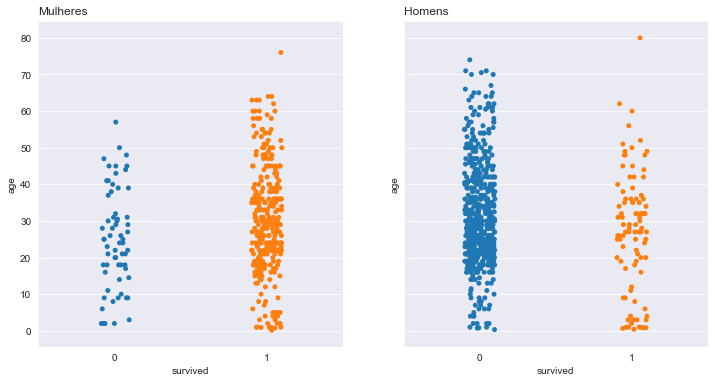

In [8]:
#sobreviventes por faixa etária


fig, (ax1,ax2)= plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)

sns.stripplot(x="survived", y="age", ax=ax1, data=women)

sns.stripplot(x="survived", y="age", ax=ax2, data=men)

ax1.set_title("Mulheres", loc="left")
ax2.set_title("Homens", loc="left")


;

<br>

### Utilizando o scatter plot para ver a concentração das escolhas das tarifas do bilhete em relação à idade
<br>

#### Observações

- Há um máximo nas tarifas, cerca de 280 libras e apenas 4 tripulantes que pagaram tarifas muito mais altas. Uma hipótese seria um golpe.

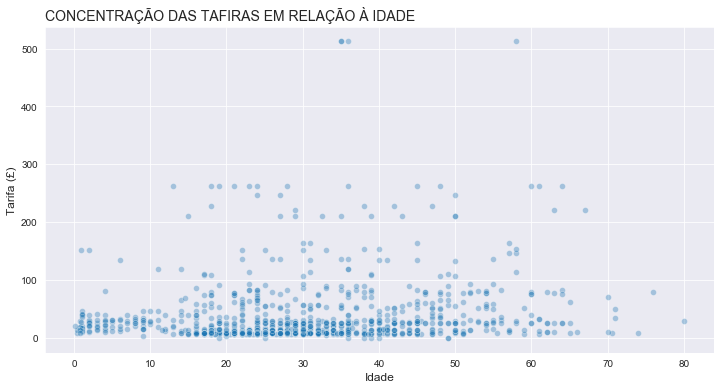

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="age", y="fare", alpha=0.35, data=df_titanic)
plt.xlabel("Idade", size=12)
plt.ylabel("Tarifa (£)", size=12)
plt.title("Concentração das tafiras em relação à idade".upper(), size=14, loc="left");


<br>

### Separando as pessoas por família
<br>

In [32]:
df_titanic["family"] = df_titanic.apply(lambda row: row["name"].split(",")[0], axis=1)

In [33]:
#verificando
df_titanic.head()

#deu certo

,passenger_id,survived,p_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [34]:
df_titanic.sort_values("family")

,passenger_id,survived,p_class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,Abbing
1283,1284,0,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S,Abbott
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S,Abbott
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S,Abbott
948,949,0,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S,Abelseth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C,del Carlo
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,van Billiard
1235,1236,0,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,van Billiard
1083,1084,0,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,NaN,S,van Billiard
